## Advantage of the implicit Euler method: An Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import solve_ivp
from scipy.optimize import root

sns.set()

%matplotlib inline

In [2]:
def explicit_euler(y_prime, y0, t_span, h, args):
    y = np.array(y0, dtype=float)
    ts = np.arange(t_span[0], t_span[1] + h, h)
    ys = np.empty((len(y0), len(ts)))
    
    for i, t in enumerate(ts):
        ys[:, i] = y
        y += h * y_prime(t, y, *args)
        
    return ts, ys

***Exercise: Point out error in previous lab's implicit Euler implementation! `y_prime(t + h)`***

In [3]:
def implicit_euler(y_prime, y0, t_span, h, args):
    y = np.array(y0, dtype=float)
    ts = np.arange(t_span[0], t_span[1] + h, h)
    ys = np.empty((len(y0), len(ts)))
    
    for i, t in enumerate(ts):
        ys[:, i] = y
        y = root(lambda x: y + h * y_prime(t + h, x, *args) - x, x0=y).x
        
    return ts, ys

In [4]:
def y_prime(t, y, a):
    return -a * y

In [5]:
def plot_comparison(a, y0, t_span, h):
    plt.close()
    plt.figure(figsize=(15, 10))

    # Firts, plot explicit and implicit approximate, numeric solutions
    ts, ys = explicit_euler(y_prime, y0, t_span, h, (a,))
    sns.lineplot(ts, ys.ravel(), label='Explicit')
    ts, ys = implicit_euler(y_prime, y0, t_span, h, (a,))
    sns.lineplot(ts, ys.ravel(), label='Implicit', color='red')

    # Plot exact, analytical solution for reference
    ts = np.linspace(*t_span, num=1000)
    ys = np.exp(-a * ts)
    sns.lineplot(ts, ys, label='Exact', color='green')
    
    plt.legend()

### First step is a very bad approximation, but gets better immediately

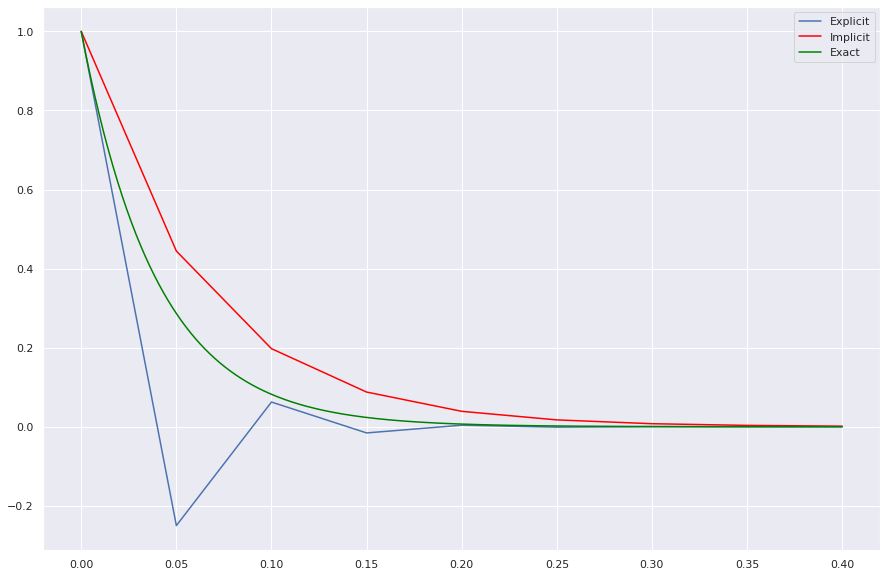

In [6]:
plot_comparison(a=25, y0=[1], t_span=(0, 0.4), h=0.05)

### First step is a very bad approximation, oscillates but converges (negative values still nonsense)

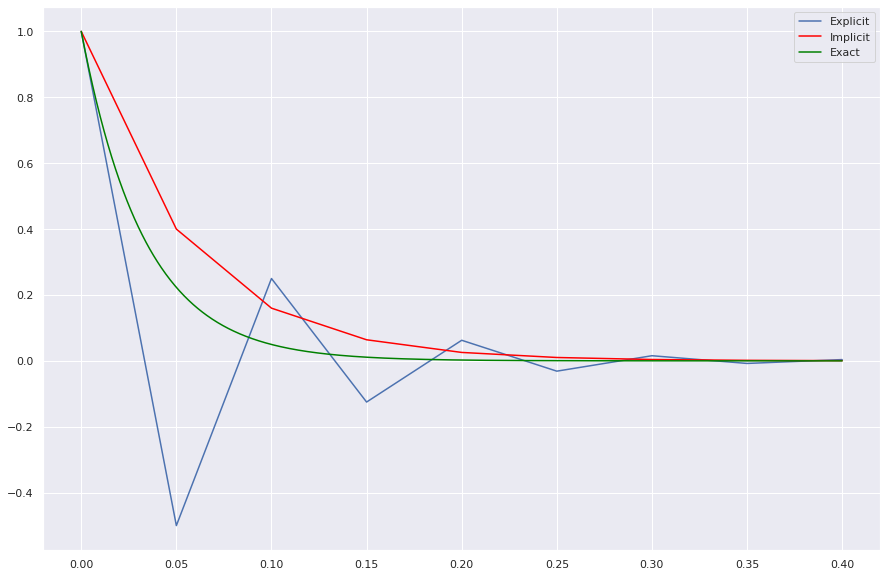

In [7]:
plot_comparison(a=30, y0=[1], t_span=(0, 0.4), h=0.05)

### Oscillates and Diverges

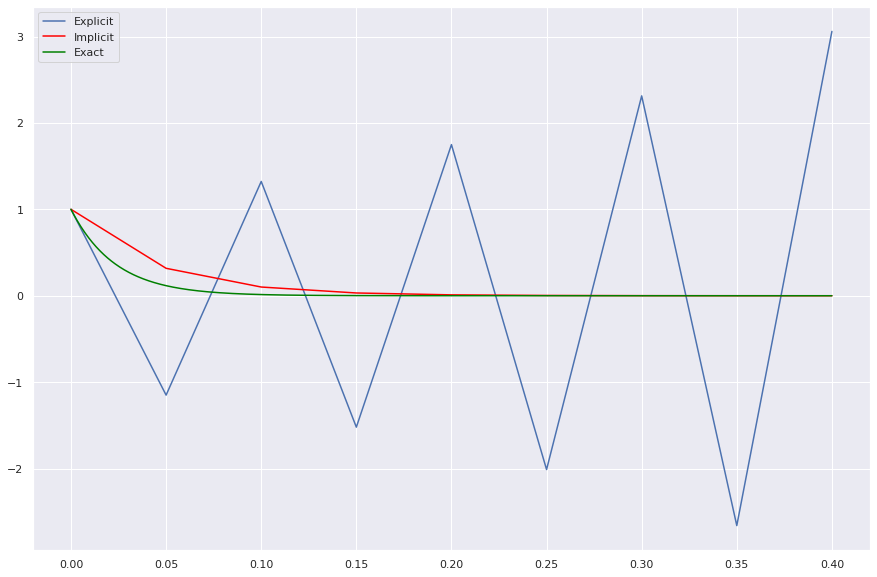

In [8]:
plot_comparison(a=43, y0=[1], t_span=(0, 0.4), h=0.05)

## Fisher's Model of Advantageous Genes

Pay attention to the cup-shaped trap region and the invariant trajectory joining `(0, 0)` with `(1, 0)`!

In [9]:
def y_prime(t, xy, c):
    x, y = xy

    return [
        y,
        -x * (1 - x) - c * y,
    ]

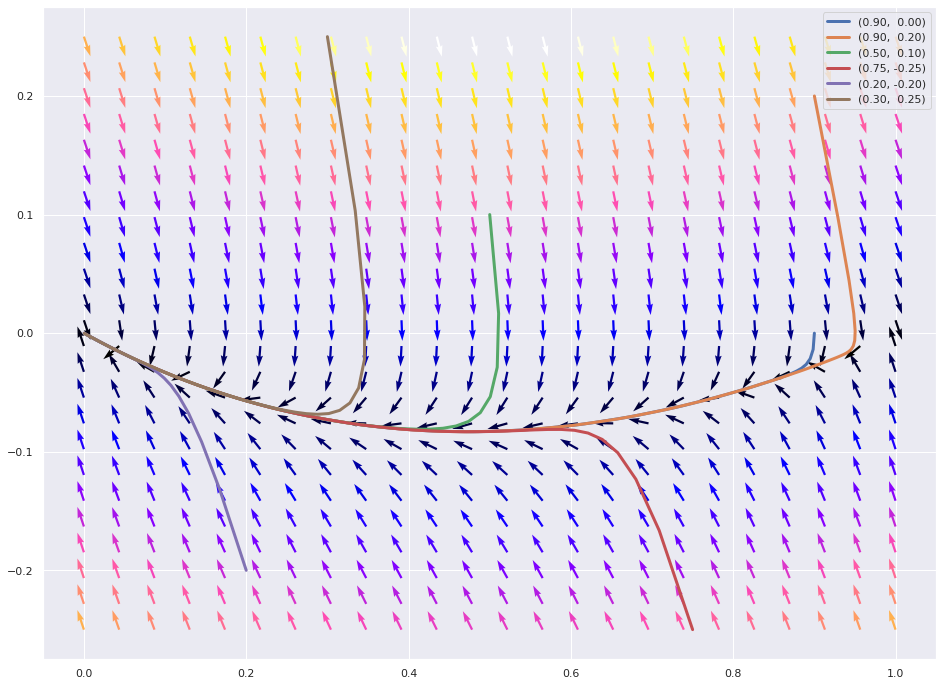

In [10]:
c = 3

# Plot Force Field
X, Y = np.meshgrid(np.linspace(0, 1, num=24), np.linspace(-0.25, 0.25, num=24))
U, V = Y, -X * (1 - X) - c * Y
mag = np.sqrt(U**2 + V**2)
U, V = U / mag, V / mag

plt.figure(figsize=(16, 12))
plt.quiver(X, Y, U, V, mag, cmap='gnuplot2')

# Plot some trajectories
def plot_trajectory(y0):
    res = solve_ivp(y_prime, t_span=(0, 20), y0=y0, t_eval=np.linspace(0, 20, num=100), args=(c,))
    t, y = res.t, res.y
    sns.lineplot(y[0, :], y[1, :], sort=False, label='({:.2f}, {:5.2f})'.format(*y0), linewidth=3)

plot_trajectory([0.90,  0.00])
plot_trajectory([0.90,  0.20])
plot_trajectory([0.50,  0.10])
plot_trajectory([0.75, -0.25])
plot_trajectory([0.20, -0.20])
plot_trajectory([0.30,  0.25])

## Cobra: A Bifurcation

* Hopf bifurcation around `mu = 1`: note the attraction vs. repulsion around `(-1, 0)` and `(1, 0)` while crossing the critical value of the parameter
* Another bifurcation near `mu = 4` and `(x, y) = (0, 0.5`): Saddle-Node!

In [11]:
def y_prime(t, xy, mu):
    x, y = xy

    return [
        -x * y,
        x**2 - y - 1 + mu * (y - y**3),
    ]

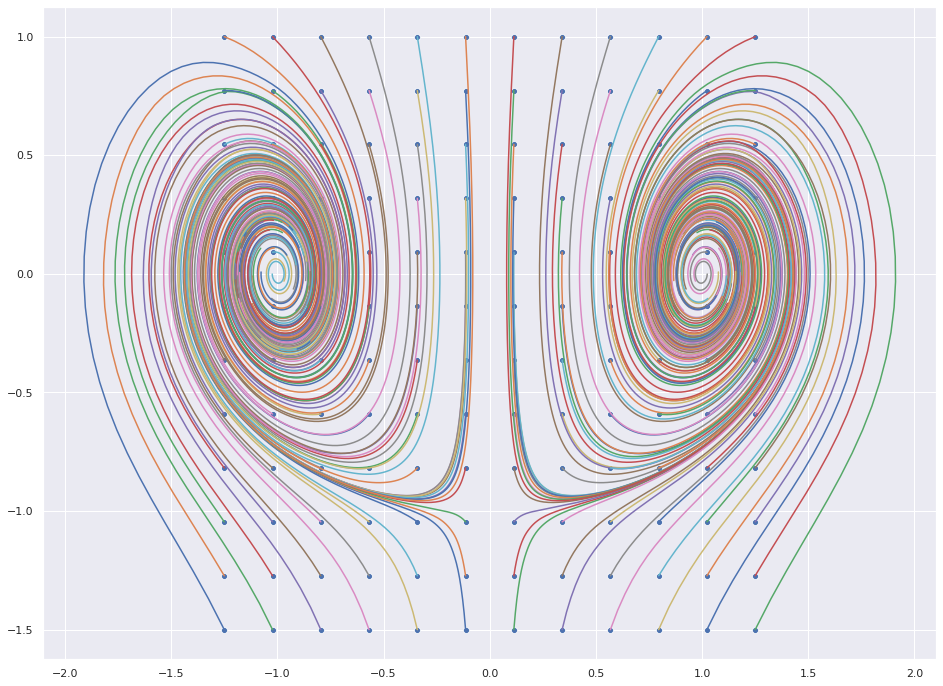

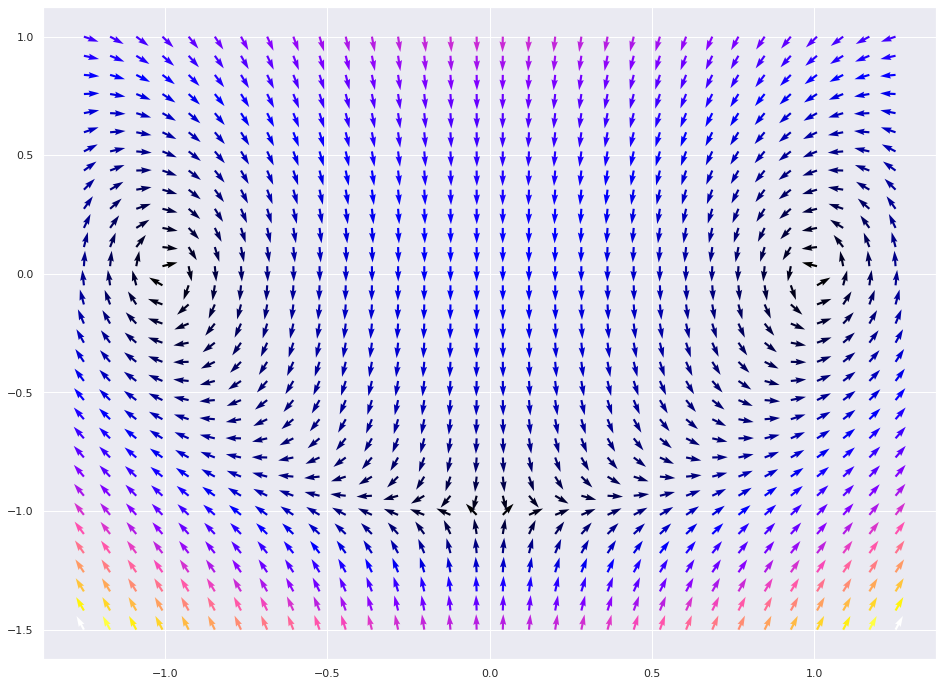

In [12]:
# Try adjusting the values of mu, for example as specified below:

mu = 0.75
# mu = 1.25
# mu = 3.8
# mu = 4.1

xlim, ylim = (-1.25, 1.25), (-1.5, 1.0)

X, Y = np.meshgrid(np.linspace(*xlim, num=12), np.linspace(*ylim, num=12))
XY = np.array([X, Y]).T.reshape(-1, 2)

plt.figure(figsize=(16, 12))
sns.scatterplot(XY[:, 0], XY[:, 1])

for xy0 in XY:
    res = solve_ivp(y_prime, y0=xy0, t_span=(0, 8), t_eval=np.linspace(0, 8, num=200), args=(mu,))
    t, xy = res.t, res.y
    sns.lineplot(xy[0, :], xy[1, :], sort=False)

# Make a finer grid for visualizing the gradient
X, Y = np.meshgrid(np.linspace(*xlim, num=32), np.linspace(*ylim, num=32))
U, V = -X * Y, X**2 - Y - 1 + mu * (Y - Y**3)
mag = np.sqrt(U**2 + V**2)
U, V = U / mag, V / mag

plt.figure(figsize=(16, 12))
plt.quiver(X, Y, U, V, mag, cmap='gnuplot2')